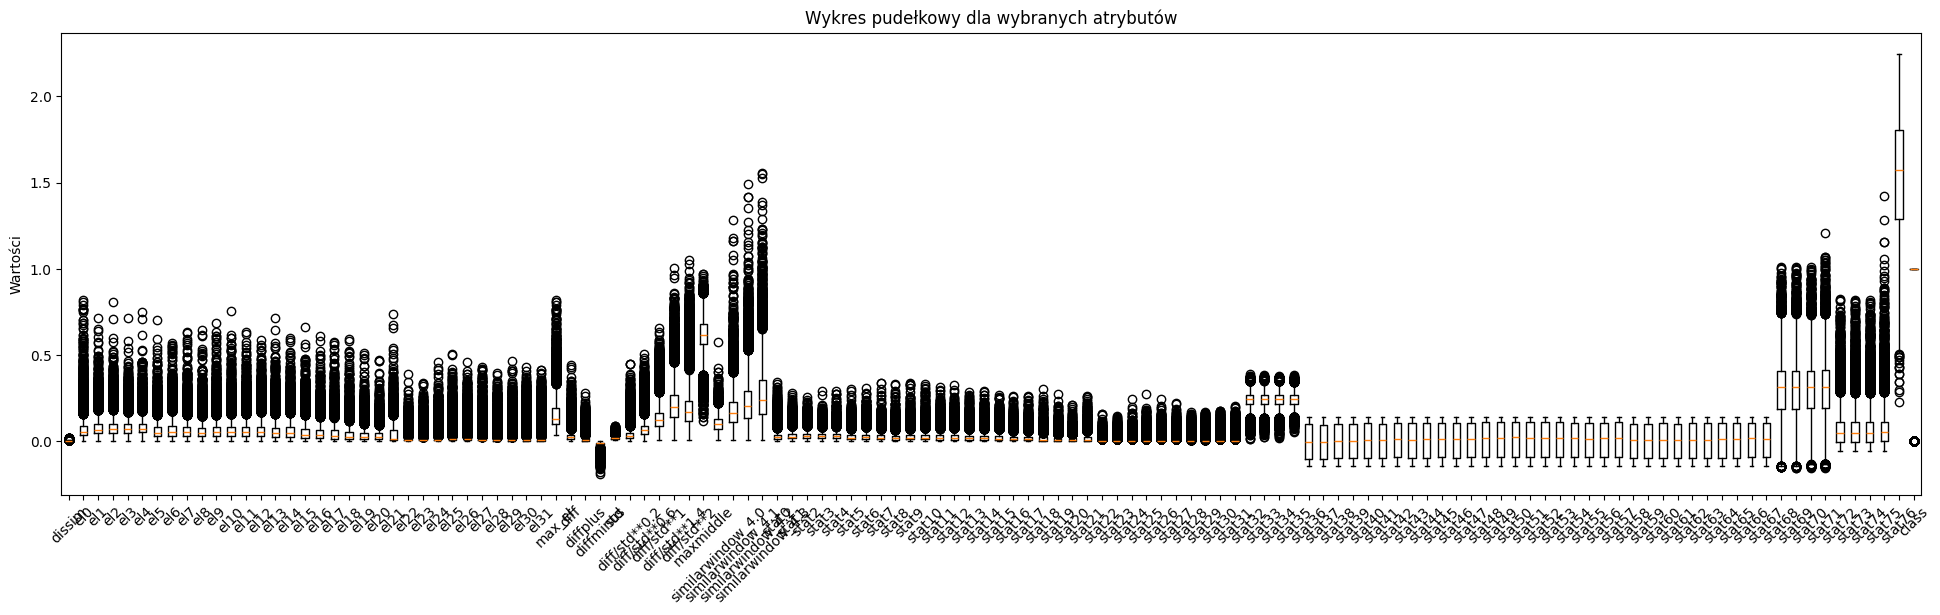

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Załaduj dane
# Zakładam, że Twój plik danych jest w formacie CSV
data_path = '147963-imbalanced.txt'
data = pd.read_csv(data_path, delimiter='\t')  # Używamy separatora tabulatora

# Wybieramy kilka atrybutów do wizualizacji, np. pierwsze 10 kolumn
selected_columns = data.columns  # Możesz wybrać inne kolumny, które są dla Ciebie interesujące
selected_data = data[selected_columns]

# Tworzenie wykresu pudełkowego
plt.figure(figsize=(24, 6))  # Ustawienie rozmiaru figury
plt.boxplot(selected_data.values, labels=selected_data.columns)
plt.xticks(rotation=45)  # Obrócenie etykiet dla lepszej czytelności
plt.title('Wykres pudełkowy dla wybranych atrybutów')
plt.ylabel('Wartości')
plt.show()